##### ***Exercise for Graph V ***
***Your Task.***
Make the graph on the right! you need to implement an `Automation` 

In [1]:
import random
from typing import Dict, TypedDict,List 
from langgraph.graph import StateGraph,START,END    

In [2]:
class AgentState(TypedDict):
    player_name: str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    target: int
    hint: str
    status: str

In [7]:
def guess_number(state: AgentState) -> AgentState:
    # ✅ Corrected syntax: state[...] not state(...)
    guess = (state["lower_bound"] + state["upper_bound"]) // 2
    state["guesses"].append(guess)
    state['attempts'] += 1
    return state

def hint_node(state: AgentState) -> AgentState:
    last_guess = state["guesses"][-1]
    target = state["target"]

    if last_guess == target:
        state['hint'] = "correct"
        state['status'] = "won"
    elif last_guess < target:
        state['hint'] = "higher"
    else:
        state['hint'] = "lower"

    return state

def update_bounds(state: AgentState) -> AgentState:
    last_guess = state["guesses"][-1]  # ✅ You were assigning the whole list
    if state['hint'] == "higher":
        state["lower_bound"] = last_guess + 1
    elif state['hint'] == "lower":
        state["upper_bound"] = last_guess - 1
    return state

def check_game_status(state: AgentState) -> str:  # ✅ Must return a string: name of next node
    if state["hint"] == "correct":
        return "end"
    elif state["attempts"] >= 7:
        state["status"] = "lost"  # ✅ Use '=' not '=='
        return "end"
    else:
        return "continue"


In [8]:
graph = StateGraph(AgentState)

graph.add_node("guess", guess_number)
graph.add_node("Hint", hint_node)
graph.add_node("update", update_bounds)

graph.add_edge(START, "guess")
graph.add_edge("guess", "Hint")
graph.add_edge("Hint", "update")

graph.add_conditional_edges(
    "update",
    check_game_status,
    {
        "continue": "guess",
        "end": END
    }
)

app = graph.compile()


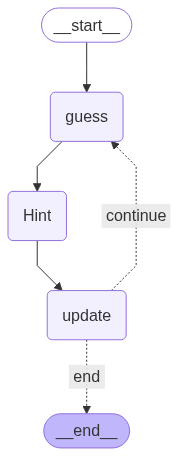

In [9]:
from IPython.display import Image, display 
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
import random

initial_state = {
    "player_name": "Samiullah Saleem",
    "guesses": [],
    "attempts": 0,
    "lower_bound": 1,
    "upper_bound": 20,
    "target": random.randint(1, 20),
    "hint": "",
    "status": ""
}

result = app.invoke(initial_state)
print("Game result:", result)


Game result: {'player_name': 'Samiullah Saleem', 'guesses': [10, 5, 7, 6], 'attempts': 4, 'lower_bound': 6, 'upper_bound': 6, 'target': 6, 'hint': 'correct', 'status': 'won'}
